Dataset Info:
Shape: (36, 4)

First 5 rows:
               Car Model  Volume  Weight  CO2
0            Toyota Aygo    1000     790   99
1  Mitsubishi Space Star    1200    1160   95
2           Skoda Citigo    1000     929   95
3               Fiat 500     900     865   90
4            Mini Cooper    1500    1140  105

Dataset Statistics:
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1605.555556  1292.277778  102.027778
std     384.666419   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

Features shape: (36, 2)
Target shape: (36,)

Training set: 28 samples
Test set: 8 samples

Feature scaling applied
Original Volume range: 900 - 2500
Original Weight range: 790 - 1746

TRAINING MULTIPLE MLP MODELS

Training Simple MLP...
Architecture: (10,)
Train

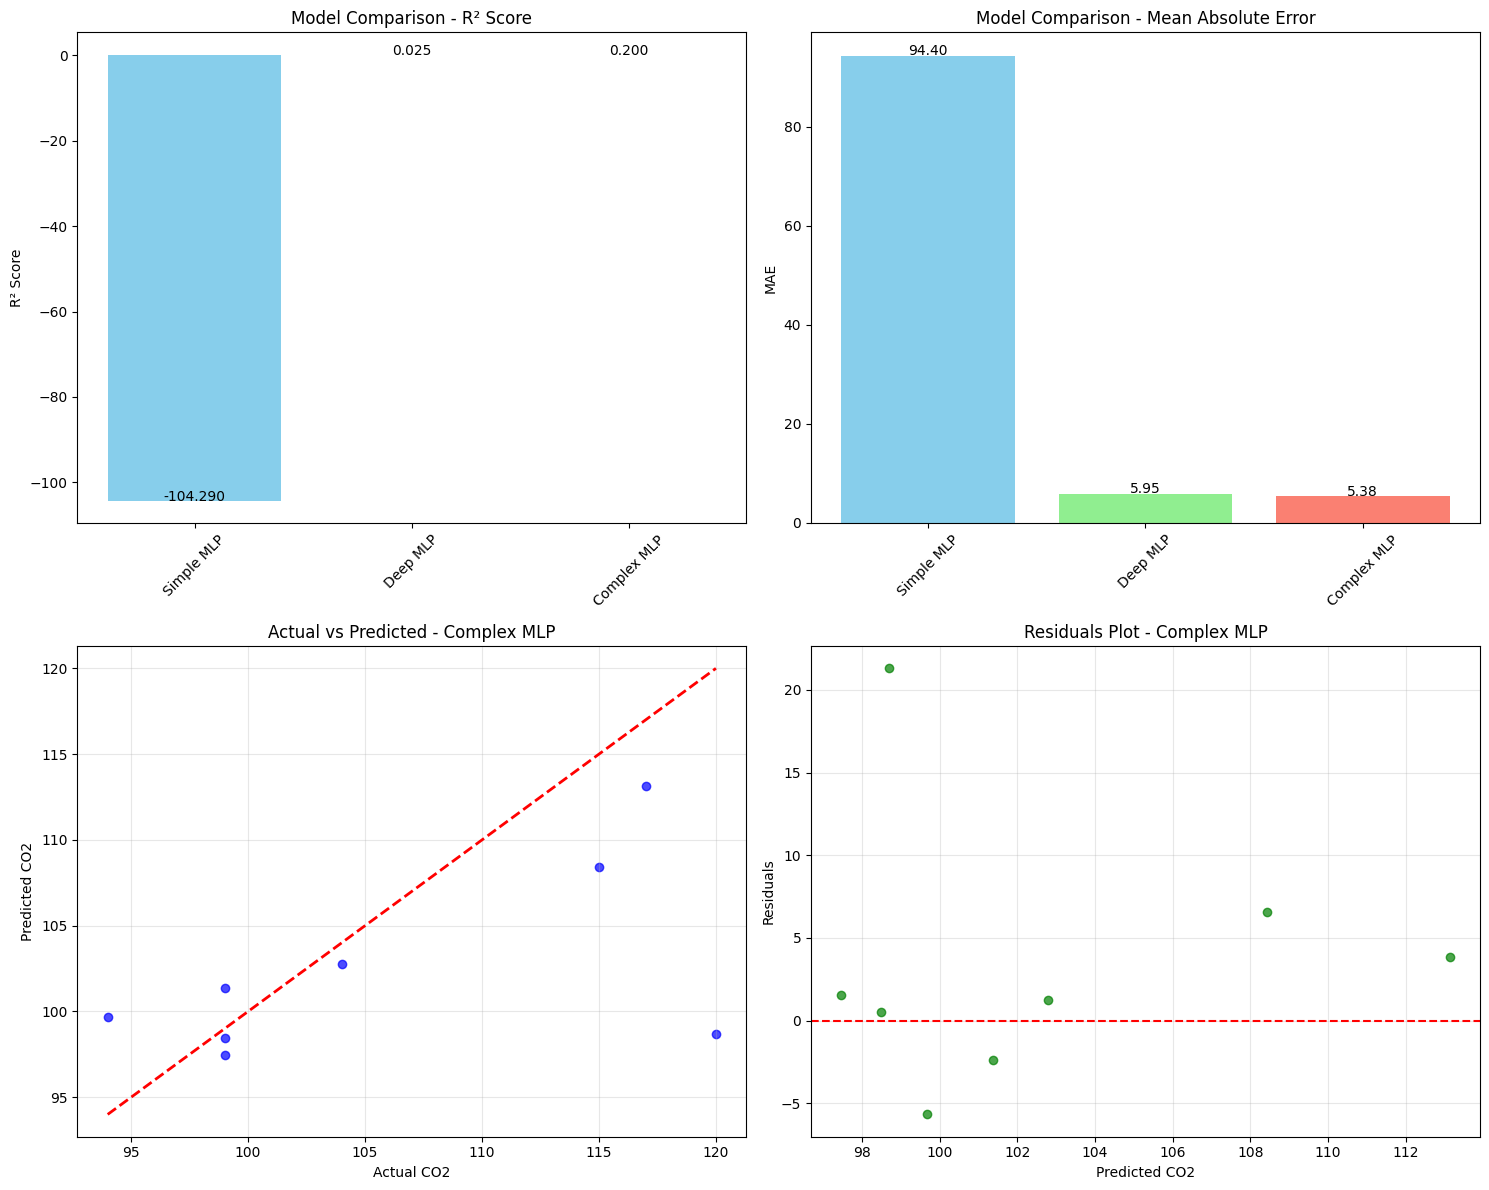


FEATURE ANALYSIS
R² with Volume only: -0.4412
R² with Weight only: 0.0755
R² with both features: 0.2003

EXAMPLE PREDICTIONS
Example predictions:
Car 1: Volume=1000cc, Weight=900kg -> Predicted CO2: 97.2g/km
Car 2: Volume=1500cc, Weight=1200kg -> Predicted CO2: 101.5g/km
Car 3: Volume=2000cc, Weight=1500kg -> Predicted CO2: 103.0g/km
Car 4: Volume=2500cc, Weight=1800kg -> Predicted CO2: 134.9g/km

MODEL TRAINING COMPLETED!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Creating the DataFrame
data = {
    'Car Model': ['Toyota Aygo', 'Mitsubishi Space Star', 'Skoda Citigo', 'Fiat 500', 'Mini Cooper', 'VW Up!', 'Skoda Fabia', 
                  'Mercedes A-Class', 'Ford Fiesta', 'Audi A1', 'Hyundai I20', 'Suzuki Swift', 'Ford Fiesta', 'Honda Civic', 
                  'Hyundai I30', 'Opel Astra', 'BMW 1', 'Mazda 3', 'Skoda Rapid', 'Ford Focus', 'Ford Mondeo', 'Opel Insignia', 
                  'Mercedes C-Class', 'Skoda Octavia', 'Volvo S60', 'Mercedes CLA', 'Audi A4', 'Audi A6', 'Volvo V70', 
                  'BMW 5', 'Mercedes E-Class', 'Volvo XC70', 'Ford B-Max', 'BMW 2', 'Opel Zafira', 'Mercedes SLK'],
    'Volume': [1000, 1200, 1000, 900, 1500, 1000, 1400, 1500, 1500, 1600, 1100, 1300, 1000, 1600, 1600, 1600, 1600, 2200, 1600, 2000,
               1600, 2000, 2100, 1600, 2000, 1500, 2000, 2000, 1600, 2000, 2100, 1600, 1600, 1600, 2500, 1800],
    'Weight': [790, 1160, 929, 865, 1140, 929, 1109, 1365, 1112, 1150, 980, 990, 1112, 1252, 1326, 1330, 1365, 1280, 1119, 1328,
               1584, 1428, 1365, 1415, 1415, 1465, 1490, 1725, 1523, 1705, 1605, 1746, 1235, 1390, 1405, 1395],
    'CO2': [99, 95, 95, 90, 105, 105, 90, 92, 98, 99, 99, 101, 99, 94, 97, 97, 99, 104, 104, 105,
            94, 99, 99, 99, 99, 102, 104, 114, 109, 114, 115, 117, 104, 108, 109, 120]
}

df = pd.DataFrame(data)
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Statistics:")
print(df.describe())

# Prepare features and target
X = df[['Volume', 'Weight']]
y = df['CO2']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling applied")
print(f"Original Volume range: {X['Volume'].min()} - {X['Volume'].max()}")
print(f"Original Weight range: {X['Weight'].min()} - {X['Weight'].max()}")

# Create and train MLP models with different architectures
mlp_models = {
    'Simple MLP': MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', 
                               max_iter=1000, random_state=42),
    'Deep MLP': MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', 
                             max_iter=1000, random_state=42),
    'Complex MLP': MLPRegressor(hidden_layer_sizes=(50, 30, 10), activation='relu', solver='adam', 
                                max_iter=1000, random_state=42)
}

results = {}

print(f"\n{'='*60}")
print("TRAINING MULTIPLE MLP MODELS")
print(f"{'='*60}")

for name, model in mlp_models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }
    
    print(f"Architecture: {model.hidden_layer_sizes}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test RMSE: {np.sqrt(test_mse):.4f}")

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]['model']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"Test MAE: {results[best_model_name]['test_mae']:.4f}")
print(f"Test RMSE: {np.sqrt(results[best_model_name]['test_mse']):.4f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model comparison
model_names = list(results.keys())
test_r2_scores = [results[name]['test_r2'] for name in model_names]
test_mae_scores = [results[name]['test_mae'] for name in model_names]

axes[0, 0].bar(model_names, test_r2_scores, color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 0].set_title('Model Comparison - R² Score')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(test_r2_scores):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. MAE comparison
axes[0, 1].bar(model_names, test_mae_scores, color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('Model Comparison - Mean Absolute Error')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(test_mae_scores):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}', ha='center')

# 3. Actual vs Predicted for best model
best_predictions = results[best_model_name]['y_test_pred']
axes[1, 0].scatter(y_test, best_predictions, alpha=0.7, color='blue')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual CO2')
axes[1, 0].set_ylabel('Predicted CO2')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals plot
residuals = y_test - best_predictions
axes[1, 1].scatter(best_predictions, residuals, alpha=0.7, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted CO2')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance analysis (using permutation importance concept)
print(f"\n{'='*60}")
print("FEATURE ANALYSIS")
print(f"{'='*60}")

# Make predictions with individual features
X_test_volume_only = X_test_scaled.copy()
X_test_volume_only[:, 1] = 0  # Set weight to 0 (scaled)

X_test_weight_only = X_test_scaled.copy()
X_test_weight_only[:, 0] = 0  # Set volume to 0 (scaled)

pred_volume_only = best_model.predict(X_test_volume_only)
pred_weight_only = best_model.predict(X_test_weight_only)
pred_both = best_model.predict(X_test_scaled)

r2_volume = r2_score(y_test, pred_volume_only)
r2_weight = r2_score(y_test, pred_weight_only)
r2_both = r2_score(y_test, pred_both)

print(f"R² with Volume only: {r2_volume:.4f}")
print(f"R² with Weight only: {r2_weight:.4f}")
print(f"R² with both features: {r2_both:.4f}")

# Example predictions
print(f"\n{'='*60}")
print("EXAMPLE PREDICTIONS")
print(f"{'='*60}")

# Create some example cars for prediction
example_cars = pd.DataFrame({
    'Volume': [1000, 1500, 2000, 2500],
    'Weight': [900, 1200, 1500, 1800]
})

example_scaled = scaler.transform(example_cars)
example_predictions = best_model.predict(example_scaled)

print("Example predictions:")
for i, (_, car) in enumerate(example_cars.iterrows()):
    print(f"Car {i+1}: Volume={car['Volume']}cc, Weight={car['Weight']}kg -> Predicted CO2: {example_predictions[i]:.1f}g/km")

print(f"\n{'='*60}")
print("MODEL TRAINING COMPLETED!")
print(f"{'='*60}")